# CO2 emissions of cars

Data from https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data

### Read column/value definitions
These were provided with the dataset.

Will edit the read dataframe for nice formatting.

In [38]:
def ExtractMeaning(s):
    try:
        return s.split('=')[1]
    except IndexError:
        return s.split('=')[0]

In [39]:
# Read description of data columns/values to refer back to later
desc = pd.read_csv('data/Data Description.csv')
desc.columns = ['Column title', 'Value meaning']

# Split value/meaning in two
desc['Value'] = desc['Value meaning'].apply(lambda s: s.split('=')[0])
desc['Meaning'] = desc['Value meaning'].apply(ExtractMeaning)
desc.drop('Value meaning', axis=1, inplace=True)

# Set index
titles = pd.Series(['Model']*6 + ['Transmission']*6 + ['Fuel type']*5 + ['Fuel consumption', 'CO2 emissions'])
desc['Column title'] = titles
desc.set_index(['Column title','Value'], inplace=True)

In [40]:
desc

Meaning
Column title     Value                                                                                                
Model            4WD/4X4                                                                              Four-wheel drive
                 AWD                                                                                   All-wheel drive
                 FFV                                                                             Flexible-fuel vehicle
                 SWB                                                                                   Short wheelbase
                 LWB                                                                                    Long wheelbase
                 EWB                                                                                Extended wheelbase
Transmission     A                                                                                           automatic
                 AM                                                                                   automated manual
                 AS                                                                        automatic with select shift
                 AV                                                                              continuously variable
                 M                                                                                              manual
                 3 - 10                                                                                Number of gears
Fuel type        X                                                                                    regular gasoline
                 Z                                                                                    premium gasoline
                 D                                                                                              diesel
                 E                                                                                       ethanol (E85)
                 N                                                                                         natural gas
Fuel consumption City and highway fuel consumption ratings are s...  City and highway fuel consumption ratings are ...
CO2 emissions    the tailpipe emissions of carbon dioxide (in gr...  the tailpipe emissions of carbon dioxide (in g...

### Read data

In [41]:
emissions = pd.read_csv('data/CO2 Emissions_Canada.csv')

In [42]:
emissions.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


## Exploratory data analysis

### Structure

In [43]:
emissions.shape

(7385, 12)

In [44]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

No missing data and data types all make sense.

In [45]:
emissions.describe(exclude='number')

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


In [46]:
emissions.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


No obvious outliers from max/min/quartiles - will investigate further later.

Means are approximately equal to medians in each case - suggests normal distributions.

<AxesSubplot:title={'center':'Unique values per feature'}>

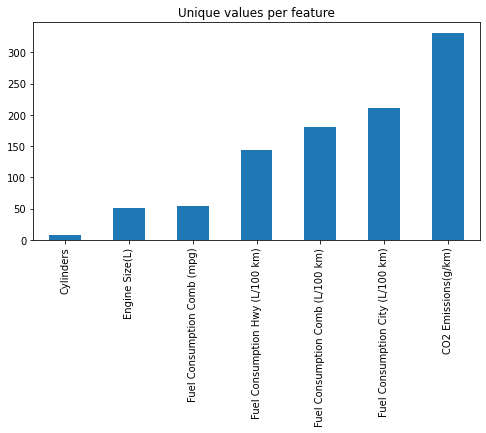

In [52]:
# Find number of unique values per numerical category to get idea of which are discrete/ordinal/continuous
unique_vals = emissions.select_dtypes(include="number").nunique().sort_values()
unique_vals.plot.bar(figsize=(8, 4), title="Unique values per feature")

Number of unique values in 'Fuel Consumption Comb (mpg)' much less than other fuel consumption categories as it appears the data gas been rounded to the nearest integer whereas the others are stored as floats.